In [84]:
#Implementation of pre flow push algorithm!

#Edge in the flow network
class Edge: 
    
    def __init__(self, flow, capacity, u, v):
        #Initializes flow and capacity between nodes
        self.flow = flow
        self.capacity = capacity
        self.u = u
        self.v = v

# Node in the Network
class Node:
  
    def __init__(self, height, excessFlow):
        #Initialization of height and excess flow
        self.height = height
        self.excessFlow = excessFlow

        
# Represents the full flow network 
class Graph:
    def __init__(self, V):
        self.V = V
        self.edge = []
        self.vertx = []
        for i in range(V):
            self.vertx.append(Node(0, 0))

    def addEdge(self, u, v, capacity):
        self.edge.append(Edge(0, capacity, u, v))

    def preflow(self, s):
        self.vertx[s].height = len(self.vertx)
        for i in range(len(self.edge)):
            if (self.edge[i].u == s):
                self.edge[i].flow = self.edge[i].capacity
                self.vertx[self.edge[i].v].excessFlow += self.edge[i].flow
                self.edge.append(Edge(-self.edge[i].flow, 0, self.edge[i].v, s))
                print("Preflow: Flow from", self.edge[i].u, "to", self.edge[i].v, ":", self.edge[i].flow)

    def overFlowVertex(self):
        for i in range(1, len(self.vertx)-1):
            if(self.vertx[i].excessFlow > 0):
                return i
        return -1

    def updateReverseEdgeFlow(self, i, flow):
        u = self.edge[i].v
        v = self.edge[i].u
        for j in range(0, len(self.edge)):
            if (self.edge[j].v == v and self.edge[j].u == u):
                self.edge[j].flow -= flow
                print("Update reverse edge flow: Flow from", u, "to", v, ":", self.edge[j].flow)
                return
        e = Edge(0, flow, u, v)
        self.edge.append(e)

    def push(self, u):
        for i in range(0, len(self.edge)):
            if (self.edge[i].u == u):
                if (self.edge[i].flow == self.edge[i].capacity):
                    continue
                if (self.vertx[u].height > self.vertx[self.edge[i].v].height):
                    flow = min(self.edge[i].capacity - self.edge[i].flow, self.vertx[u].excessFlow)
                    self.vertx[u].excessFlow -= flow
                    self.vertx[self.edge[i].v].excessFlow += flow
                    self.edge[i].flow += flow
                    self.updateReverseEdgeFlow(i, flow)
                    print("Push: Flow from", u, "to", self.edge[i].v, ":", flow)
                    return True
        return False

    def relabel(self, u):
        mh = float('inf')
        for i in range(len(self.edge)):
            if (self.edge[i].u == u):
                if (self.edge[i].flow == self.edge[i].capacity):
                    continue
                if (self.vertx[self.edge[i].v].height < mh):
                    mh = self.vertx[self.edge[i].v].height
        self.vertx[u].height = mh + 1
        print("Relabel: Height of", u, ":", self.vertx[u].height)

    def getMaxFlow(self, s, t):
        self.preflow(s)
        while (self.overFlowVertex() != -1):
            u = self.overFlowVertex()
            if (self.push(u) == False):
                self.relabel(u)
        return self.vertx[len(self.vertx)-1].excessFlow


In [85]:
# Test Program with known max flow graph
V = 6; 
g = Graph(V)

g.addEdge(0, 1, 16); 
g.addEdge(0, 2, 13); 
g.addEdge(1, 2, 10); 
g.addEdge(2, 1, 4); 
g.addEdge(1, 3, 12); 
g.addEdge(2, 4, 14); 
g.addEdge(3, 2, 9); 
g.addEdge(3, 5, 20); 
g.addEdge(4, 3, 7); 
g.addEdge(4, 5, 4); 

# Initialize source and sink 
s = 0
t = 5; 

print("Maximum flow is ",  g.getMaxFlow(s, t))

Preflow: Flow from 0 to 1 : 16
Preflow: Flow from 0 to 2 : 13
Relabel: Height of 1 : 1
Update reverse edge flow: Flow from 2 to 1 : -10
Push: Flow from 1 to 2 : 10
Push: Flow from 1 to 3 : 6
Relabel: Height of 2 : 1
Push: Flow from 2 to 4 : 14
Relabel: Height of 2 : 2
Update reverse edge flow: Flow from 1 to 2 : 1
Push: Flow from 2 to 1 : 9
Update reverse edge flow: Flow from 3 to 1 : -6
Push: Flow from 1 to 3 : 6
Relabel: Height of 1 : 3
Update reverse edge flow: Flow from 2 to 1 : -4
Push: Flow from 1 to 2 : 3
Relabel: Height of 2 : 4
Update reverse edge flow: Flow from 1 to 2 : 1
Push: Flow from 2 to 1 : 3
Relabel: Height of 1 : 5
Update reverse edge flow: Flow from 2 to 1 : -4
Push: Flow from 1 to 2 : 3
Relabel: Height of 2 : 6
Update reverse edge flow: Flow from 1 to 2 : 1
Push: Flow from 2 to 1 : 3
Relabel: Height of 1 : 7
Update reverse edge flow: Flow from 2 to 1 : -4
Push: Flow from 1 to 2 : 3
Relabel: Height of 2 : 7
Update reverse edge flow: Flow from 0 to 2 : 10
Push: Flow 

In [46]:
# Create a list to store the demand values for each refugee camp
demands = [10, 8, 12]  # Demand for Camp 1, Camp 2, and Camp 3, respectively

V = 8  # Number of nodes (source, sink, 3 refugee camps, and 3 demand nodes)
g = Graph(V)

# Add edges from source to refugee camps
g.addEdge(0, 1, 20)  # Source to Camp 1, capacity 20
g.addEdge(0, 2, 15)  # Source to Camp 2, capacity 15
g.addEdge(0, 3, 25)  # Source to Camp 3, capacity 25

# Add edges between refugee camps (for aid redistribution)
g.addEdge(1, 2, 10)  # Camp 1 to Camp 2, capacity 10
g.addEdge(2, 3, 8)   # Camp 2 to Camp 3, capacity 8

# Add edges from refugee camps to demand nodes (with infinite capacity)
g.addEdge(1, 4, float('inf'))  # Camp 1 to Demand 1
g.addEdge(2, 5, float('inf'))  # Camp 2 to Demand 2
g.addEdge(3, 6, float('inf'))  # Camp 3 to Demand 3

# Add edges from demand nodes to sink (with capacity equal to demand)
g.addEdge(4, 7, demands[0])  # Demand 1 to Sink, capacity equal to demand[0]
g.addEdge(5, 7, demands[1])  # Demand 2 to Sink, capacity equal to demand[1]
g.addEdge(6, 7, demands[2])  # Demand 3 to Sink, capacity equal to demand[2]

s = 0  # Source node
t = 7  # Sink node

print("Maximum aid that can be distributed:", g.getMaxFlow(s, t))

Maximum aid that can be distributed: 30


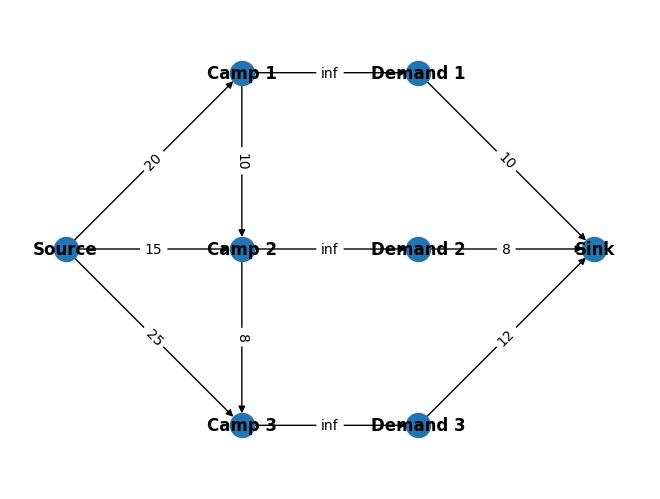

In [78]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a list to store the demand values for each refugee camp
demands = [10, 8, 12]  # Demand for Camp 1, Camp 2, and Camp 3, respectively

# Create a networkx graph
G = nx.DiGraph()

# Add nodes
G.add_node('Source', pos=(0, 0))
G.add_node('Camp 1', pos=(1, 1))
G.add_node('Camp 2', pos=(1, 0))
G.add_node('Camp 3', pos=(1, -1))
G.add_node('Demand 1', pos=(2, 1))
G.add_node('Demand 2', pos=(2, 0))
G.add_node('Demand 3', pos=(2, -1))
G.add_node('Sink', pos=(3, 0))

# Add edges from source to refugee camps
G.add_edge('Source', 'Camp 1', capacity=20)
G.add_edge('Source', 'Camp 2', capacity=15)
G.add_edge('Source', 'Camp 3', capacity=25)

# Add edges between refugee camps (for aid redistribution)
G.add_edge('Camp 1', 'Camp 2', capacity=10)
G.add_edge('Camp 2', 'Camp 3', capacity=8)

# Add edges from refugee camps to demand nodes (with infinite capacity)
G.add_edge('Camp 1', 'Demand 1', capacity=float('inf'))
G.add_edge('Camp 2', 'Demand 2', capacity=float('inf'))
G.add_edge('Camp 3', 'Demand 3', capacity=float('inf'))

# Add edges from demand nodes to sink (with capacity equal to demand)
G.add_edge('Demand 1', 'Sink', capacity=demands[0])
G.add_edge('Demand 2', 'Sink', capacity=demands[1])
G.add_edge('Demand 3', 'Sink', capacity=demands[2])

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.axis('equal')
plt.show()

Maximum flow of aid to refugee camps: 450


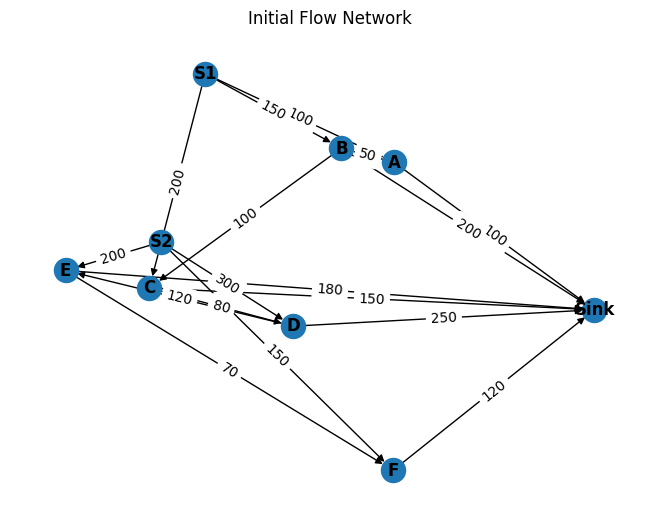

In [83]:
V = 9  # Total number of vertices (2 supply points, 6 camps, and 1 sink)
g = Graph(V)

# Add edges from supply points to camps
g.addEdge(0, 1, 100)  # S1 to A
g.addEdge(0, 2, 150)  # S1 to B
g.addEdge(0, 3, 200)  # S1 to C
g.addEdge(1, 4, 300)  # S2 to D
g.addEdge(1, 5, 200)  # S2 to E
g.addEdge(1, 6, 150)  # S2 to F

# Add edges between camps
g.addEdge(2, 3, 50)   # A to B
g.addEdge(3, 4, 100)  # B to C
g.addEdge(4, 5, 80)   # C to D
g.addEdge(5, 6, 120)  # D to E
g.addEdge(6, 7, 70)   # E to F

# Add edges from camps to sink (with demand as capacity)
g.addEdge(2, 8, 100)  # A to sink
g.addEdge(3, 8, 200)  # B to sink
g.addEdge(4, 8, 150)  # C to sink
g.addEdge(5, 8, 250)  # D to sink
g.addEdge(6, 8, 180)  # E to sink
g.addEdge(7, 8, 120)  # F to sink

# Initialize source and sink
s = 0  # Supply point S1
t = 8   # Sink vertex
# Create a NetworkX graph
G = nx.DiGraph()

# Map node indices to names
node_names = ["S1", "S2", "A", "B", "C", "D", "E", "F", "Sink"]
node_mapping = {i: name for i, name in enumerate(node_names)}

G.add_node('S1', pos=(0, 0))
G.add_node('S2', pos=(1, 1))
G.add_node('A', pos=(1, 0))
G.add_node('B', pos=(1, -1))
G.add_node('C', pos=(2, 1))
G.add_node('D', pos=(2, 0))
G.add_node('E', pos=(2, -1))
G.add_node('F', pos=(3, 0))
G.add_node('Sink', pos=(3, 1))

# Add edges from source to refugee camps and between camps
G.add_edge('S1', 'A', capacity=100)
G.add_edge('S1', 'B', capacity=150)
G.add_edge('S1', 'C', capacity=200)
G.add_edge('S2', 'D', capacity=300)
G.add_edge('S2', 'E', capacity=200)
G.add_edge('S2', 'F', capacity=150)

G.add_edge('A', 'B', capacity=50)
G.add_edge('B', 'C', capacity=100)
G.add_edge('C', 'D', capacity=80)
G.add_edge('D', 'E', capacity=120)
G.add_edge('E', 'F', capacity=70)

G.add_edge('A', 'Sink', capacity=100)
G.add_edge('B', 'Sink', capacity=200)
G.add_edge('C', 'Sink', capacity=150)
G.add_edge('D', 'Sink', capacity=250)
G.add_edge('E', 'Sink', capacity=180)
G.add_edge('F', 'Sink', capacity=120)


# Get the maximum flow
max_flow = g.getMaxFlow(s, t)
print("Maximum flow of aid to refugee camps:", max_flow)

# Draw the initial flow network
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Initial Flow Network")
plt.show()